# Aula 12. Pandas
<img  src= "img/pandas1.jpeg" style="width:500px; height:500px">

Pandas é uma das bibliotecas mais utilizadas em Python para manipulação e análise de dados. Esta biblioteca é de código aberto, escrita em Numpy e oferece estruturas e operações para manipulação de tabelas numéricas e séries temporais.

Os principais destaques são:
- Possui dois tipos de objetos `pandas.core.frame.DataFrame` e `pandas.core.series.Series` com indexação integrada;
- Facilita a leitura, escrita e modificação de arquivos com diferentes formatos, entre os quais se destaca .csv, .txt, .xlsx, SQL, HDF5 (Hierarchical Data Format version 5) dentre outros;
- Permite tabelas com diferentes niveis de indexação;
- Permite agrupamento de dados por categorias;
- Realiza mesclagem e junção de conjuntos de dados com alto desempenho;
- Altamente otimizado com códigos escritos em Cython e C;
- Pandas é amplamente utilizado em ambientes acadêmicos e comerciais, incluindo finanças, neurociência, economia, estatística, publicidade, análise da web e muito mais.
---
 
  <font size="6"> Os tópicos que vamos abordar nesta série de conversar são:</font>

- [X] Instalação de pandas;
- [x] Importando pandas;
- [x] Series;
- [x] DataFrame e manipulação;
 - [X] Criação de DataFrame;
 - [X] Extraindo informação por colunas. CUIDADO COM NOTAÇÃO SQL;
 - [X] Extraindo utilizando função loc;
 - [X] Extraindo utilizando função iloc;
 - [X] Adicionando novas colunas;
 - [X] Adicionando novas filas (função append);
 - [X] Eliminando colunas ou filas.
- [X] Operadores de comparação e seleção condicional;
- [X] Dados ausentes;
 - [X] Dropna
 - [ ] filna
 - [ ] replace
- [ ] Groupby, aggregate e apply
- [ ] Juntando diffenrentes `DataFrame` 
 - [ ] `concat`
 - [ ] `merge`
 - [ ] `join`
- Operação
- Importando e exportando dados.
- Aplicação
---
<font size="5"> Recomento visitar o site oficial do projeto [Pandas](https://pandas.pydata.org/) para conhecer mais um pouco desta biblioteca.</font>

## Intalação do pandas

Para instalar pandas no nosso computador podemos utilizar o condas ou o pip.
```python
conda install pandas
pip install pandas
```

## importando pandas e numpy

In [1]:
import pandas as pd
import numpy as np

## Series
O conceito principal de uma [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) em Pandas e trabalhar com vetores a partir do indice ou labels. A sintaxe para definir uma Series é:
```python
 pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
```

In [ ]:
# Definindo algumas variaveis que vamos utilizar
valores  = np.random.randn(1, 10).reshape(10,)
index_row = "A B C D E F G H I J".split(" ")
d = {key: value for key, value in zip(index_row, valores)}

In [ ]:
# Criando uma Series passando somente os valores
pd.Series(valores)

In [ ]:
# Criando uma Series passando data e index
pd.Series(data=valores, index=index_row)

In [ ]:
# Observemos que pomodes criar uma Series passando qualquer tipo de dados
pd.Series(index=valores, data=index_row)

In [ ]:
# Observemos que uma Series se comporta muito semelhante ao dicionário dado que ela trabalhar com chave: valor,
# portanto podemos criar uma Seires passando um dicionário
pd.Series(d)

Mas qual é a vantagem de utilizar uma Series em relação ao arrays?

In [ ]:
series_1 = pd.Series(data=[5, 10, 20, 30, 8], index="A B C D J".split(" "))
series_2 = pd.Series(data=[20, 15, 15, 5, 25], index="A B K D C".split(" "))
print(series_1)
print(series_2)
print(series_1 + series_2)

## DataFrame e manipulação
O objeto principal de Pandas é o [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), este objeto se aproxima ao que conhecemos como planilha de excell (somente em aparência). Para definir um DataFrame utilizamos a seguinte sintaxe:
```python
pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
```
Neste caso os argumentos mais relevantes são `data`, `index` e `columns`, porém o único argumento obrigatório é o `data`.

### Criação de DataFrame

In [ ]:
data = np.arange(1, 17).reshape((4,4))
index = "Row_1 Row_2 Row_3 Row_4".split(" ")
col = "Col_1 Col_2 Col_3 Col_4".split(" ")

In [ ]:
data

In [ ]:
# Definindo um DataFrame passando data
pd.DataFrame(data)

In [ ]:
# Definindo um DataFrame passando data e index
pd.DataFrame(data, index)

In [ ]:
# Definindo um DataFrame passando todos data, index e columns
data_frame = pd.DataFrame(data, index, col)
data_frame

### Extraindo informação por colunas. *CUIDADO COM NOTAÇÃO SQL*

In [ ]:
# Extraindo informação da columna Col_4
data_frame["Col_4"]

In [ ]:
# Podemos utilizar a notação de ponto e o nome da columna, porém esta forma não é recomendada
data_frame.Col_3

### Extraindo utilizando função loc
A propriedade [`loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) permite obter os dados de um DataFrame a partir dos labels das filas e das coluna. A sintaxe para aplicar esta propriedade é:
```python
DataFrame.loc[]
```

In [ ]:
# Podemos utilizar a função loc para extrair informação utilizando o índice da fila e o nome da coluna
data_frame.loc["Row_1", "Col_1"]

In [ ]:
# Para extrair diferentes colunas ou fila passamos uma lista com os nomes das colunas e filas
data_frame.loc[["Row_1", "Row_4"], ["Col_1", "Col_4"]]

In [ ]:
# Também podemos utilizar a função loc para extrair filas
data_frame.loc["Row_3"]

### Extraindo utilizando função iloc
Existe outra forma de extrair os valores de um DataFrame utilizando a notação aprendida em Numpy, para isso utilizamos a propriedade [`iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html):
```python
DataFrame.iloc[]
```

In [ ]:
data_frame.iloc[0, 0]

In [ ]:
data_frame.iloc[ [0, -1], [0, -1]]

In [ ]:
data_frame.iloc[2]

In [ ]:
data_frame.iloc[2:]

### Adicionando novas colunas

In [ ]:
data_frame["Col_nova"] = data_frame.iloc[:, -1] + data_frame.iloc[:, 0]
data_frame

In [ ]:
data_frame["Col_nova_2"]  = 2
data_frame

In [ ]:
data_frame

### Adicionando novas filas (função append)
Para adicionar uma nova fila utilizamos a função [append()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html), essa função adiciona uma nova (ou novas) fila(s) no final do DataFrame. A sintaxe utilizada para isso é:
```python
DataFrame.append(other, ignore_index=False, verify_integrity=False, sort=False)
```

In [ ]:
np.array([[1,2,3,4]])

In [ ]:
data_frame2 = pd.DataFrame([[1,2,3,4]], columns=col)
data_frame.append(data_frame2)

In [ ]:
data_frame.append(data_frame*10)

### Eliminando colunas ou filas
Para eliminar colunas ou filas de um DataFrame utilizamos a função [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html). Neste caso se deve passar o indice da fila que será eliminada ou o label da coluna. Além disso, deve-se especificar o `axis` o qual é 0 para filas e 1 para columnas. A sintaxe utilizada é:

```python
DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
```

In [ ]:
data_frame

In [ ]:
# Eliminando a primeira fila
data_frame.drop("Row_1", axis=0)

In [ ]:
# Eliminando varias filas 
data_frame.drop(["Row_1", "Row_3"], axis=0)

In [ ]:
# Eliminando a primeira coluna
data_frame.drop("Col_1", axis=1)

In [ ]:
data_frame

In [ ]:
# Eliminando a varias colunas coluna
data_frame.drop(["Col_1", "Col_4"], axis=1, inplace=True)


In [ ]:
data_frame
# é interessante o fato de não modificar o data_frame original?

## Operadores de comparação e seleção condicional
Da mesma forma que é possível aplicar operadores de comparação em arrays, com pandas podemos aplicar os mesmos operadores.

In [ ]:
# Criando dados para trabalhar
np.random.seed(100)
data2 = np.random.randint(-10, 10, (5,5))
col2 = [f"Col_{i}" for i in range(1, 6)]
row2 = [f"Row_{i}" for i in range(1, 6)]
data_frame2 = pd.DataFrame(data2, row2, col2)
data_frame2 

In [ ]:
data_frame2 > 0

In [ ]:
# Podemos atribuir esse teste de comparação a uma variável e utiliza-o para realizar seleção
comp = data_frame2 > 0
data_frame2[comp] 
# data_frame2[data_frame2 > 0] 
data_frame2

In [ ]:
# Aplicando uma comparação numa serie
comp = data_frame2["Col_5"] > 0
data_frame2[comp]["Col_1"]
data_frame2

In [ ]:
# Aplicando comparações multiples
comp1 = data_frame2["Col_5"] >= 2 #(Row_1, Row_2 e Row_4)
comp2 = data_frame2["Col_3"] < -1 # (Row_1, Row_2)
data_frame2[comp2 & comp1]

In [ ]:
# As tres linhas anteriores são equivalentes a:
data_frame2[(data_frame2["Col_5"] >= 2) & (data_frame2["Col_3"] < -1)]

In [ ]:
data_frame2

## Dados ausentes [CONTINUAR]
Quando trabalhamos com dados provenientes de fontes externas (como base de dados, dados de sensores, etc), pode acontecer que existam dados com valores "inapropriados" ou valores ausentes. Nesse caso a biblioteca Pandas ajuda a processar esses valores.

Cabe destacar que o conceito de dado "inapropriado" varia de cenário para cenário e aforma de tratar esses dados pode varia. Porém, Pandas possui uma diversa variedade de funções e metódos que podem ser utilizados para essa finalidade.

Recomendo a leitura de [Working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html). Nesta leitura a empresa desenvolvedora da biblioteca Pandas apresenta varias formas de processar dados ausentes.


In [30]:
# Criando data frame com valores nan
np.random.seed(100)
n = 10
data2 = np.random.randint(-10, 10, (n, n)).astype(object)
col2 = [f"Col_{i}" for i in range(1, n + 1)]
row2 = [f"Row_{i}" for i in range(1, n + 1)]
for r in range(n):
    for c in range(n):
        if np.random.random() < 0.25:
            data2[r, c] = np.nan
data_frame_nan = pd.DataFrame(data2, row2, col2)
data_frame_nan

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,-7,NaN,5,6,0,-8,-8,-8,4
Row_2,-8,7,6,NaN,-6,1,6,-1,-8,NaN
Row_3,-6,-9,3,9,-6,-6,-7,-3,7,5
Row_4,NaN,NaN,NaN,6,-8,NaN,9,-8,4,7
Row_5,6,5,-3,3,NaN,2,8,-10,-8,0
Row_6,7,NaN,3,0,NaN,NaN,8,-2,9,4
Row_7,-10,NaN,2,0,NaN,-4,NaN,5,0,NaN
Row_8,-7,NaN,6,1,-6,-5,-3,-4,-8,0
Row_9,8,NaN,2,-9,-4,0,-10,-8,9,-6
Row_10,8,NaN,NaN,-1,NaN,6,-4,-5,NaN,NaN


### Dropna

Para excluir valores faltantes `NaN` utilizamos a função [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html). Os argumentos necessarios para esta função são:

```python
DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
```

In [31]:
# Elimiando os valores NaN, observemos que o resultado é somente Row_3
# Neste caso definimos axis=0, o que indica que caso alguma fila tenha pelo menos um Nan, a fila será excluida
data_frame_nan.dropna(axis=0)

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10
Row_3,-6,-9,3,9,-6,-6,-7,-3,7,5


In [32]:
# Elimiando os valores NaN, observemos que o resultado é somente Col_8
# Neste caso definimos axis=0, o que indica que caso alguma fila tenha pelo menos um Nan, a fila será excluida
data_frame_nan.dropna(axis=1)

,Col_8
Row_1,-8
Row_2,-1
Row_3,-3
Row_4,-8
Row_5,-10
Row_6,-2
Row_7,5
Row_8,-4
Row_9,-8
Row_10,-5


In [33]:
# Também podemos definir a quantidade de valores no Nan que vamos aceitar. Por tanto se queremos aceitar
# pelo menos um NaN devemos de passar `thresh=9`
data_frame_nan.dropna(axis=1,thresh=9)

,Col_1,Col_4,Col_7,Col_8,Col_9
Row_1,-2,5,-8,-8,-8
Row_2,-8,NaN,6,-1,-8
Row_3,-6,9,-7,-3,7
Row_4,NaN,6,9,-8,4
Row_5,6,3,8,-10,-8
Row_6,7,0,8,-2,9
Row_7,-10,0,NaN,5,0
Row_8,-7,1,-3,-4,-8
Row_9,8,-9,-10,-8,9
Row_10,8,-1,-4,-5,NaN


In [34]:
# Observemos que a tabela original não foi modificada.
data_frame_nan

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,-7,NaN,5,6,0,-8,-8,-8,4
Row_2,-8,7,6,NaN,-6,1,6,-1,-8,NaN
Row_3,-6,-9,3,9,-6,-6,-7,-3,7,5
Row_4,NaN,NaN,NaN,6,-8,NaN,9,-8,4,7
Row_5,6,5,-3,3,NaN,2,8,-10,-8,0
Row_6,7,NaN,3,0,NaN,NaN,8,-2,9,4
Row_7,-10,NaN,2,0,NaN,-4,NaN,5,0,NaN
Row_8,-7,NaN,6,1,-6,-5,-3,-4,-8,0
Row_9,8,NaN,2,-9,-4,0,-10,-8,9,-6
Row_10,8,NaN,NaN,-1,NaN,6,-4,-5,NaN,NaN


In [35]:
# Se queremos modificar o arquivo original devemos passar `inplace=True`
data_frame_nan.dropna(axis=1,thresh=7, inplace=True)
data_frame_nan

,Col_1,Col_3,Col_4,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,NaN,5,0,-8,-8,-8,4
Row_2,-8,6,NaN,1,6,-1,-8,NaN
Row_3,-6,3,9,-6,-7,-3,7,5
Row_4,NaN,NaN,6,NaN,9,-8,4,7
Row_5,6,-3,3,2,8,-10,-8,0
Row_6,7,3,0,NaN,8,-2,9,4
Row_7,-10,2,0,-4,NaN,5,0,NaN
Row_8,-7,6,1,-5,-3,-4,-8,0
Row_9,8,2,-9,0,-10,-8,9,-6
Row_10,8,NaN,-1,6,-4,-5,NaN,NaN


### fillna
Outra forma de processar os dados faltantes é utilizando a função [`fillna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) a qual permite substituir o valor faltante por outro valor.
```python
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)
```

In [36]:
# Criando data frame com valores nan
np.random.seed(100)
n = 10
data2 = np.random.randint(25, 37, (n, n)).astype(object)
col2 = [f"Day_{i}" for i in range(1, n + 1)]
row2 = [f"Time_{i}" for i in range(1, n + 1)]
for r in range(n):
    for c in range(n):
        if np.random.random() < 0.25:
            data2[r, c] = np.nan
data_frame_fillna = pd.DataFrame(data2, row2, col2)
data_frame_fillna

,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10
Time_1,33,33,NaN,32,32,25,35,29,NaN,30
Time_2,27,27,27,26,NaN,33,29,36,35,NaN
Time_3,36,NaN,NaN,27,NaN,29,26,30,28,29
Time_4,NaN,36,36,28,32,NaN,26,NaN,32,NaN
Time_5,25,NaN,34,34,28,27,NaN,36,33,NaN
Time_6,NaN,32,31,NaN,25,33,27,30,35,26
Time_7,33,35,26,30,29,27,33,36,36,NaN
Time_8,30,25,34,35,28,31,28,29,35,32
Time_9,NaN,28,34,NaN,29,NaN,29,30,32,31
Time_10,31,NaN,35,29,27,32,26,35,31,35


In [37]:
data_frame_fillna.fillna(value="VALOR ERRADO")

,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10
Time_1,33,33,VALOR ERRADO,32,32,25,35,29,VALOR ERRADO,30
Time_2,27,27,27,26,VALOR ERRADO,33,29,36,35,VALOR ERRADO
Time_3,36,VALOR ERRADO,VALOR ERRADO,27,VALOR ERRADO,29,26,30,28,29
Time_4,VALOR ERRADO,36,36,28,32,VALOR ERRADO,26,VALOR ERRADO,32,VALOR ERRADO
Time_5,25,VALOR ERRADO,34,34,28,27,VALOR ERRADO,36,33,VALOR ERRADO
Time_6,VALOR ERRADO,32,31,VALOR ERRADO,25,33,27,30,35,26
Time_7,33,35,26,30,29,27,33,36,36,VALOR ERRADO
Time_8,30,25,34,35,28,31,28,29,35,32
Time_9,VALOR ERRADO,28,34,VALOR ERRADO,29,VALOR ERRADO,29,30,32,31
Time_10,31,VALOR ERRADO,35,29,27,32,26,35,31,35


In [49]:
# Caso queiramos preencher o valor faltante pelo valor anterior podemos realizar isso aplicando o `method="ffill"`
# Criando data frame com valores nan
np.random.seed(100)
n = 1440 # Equivalente a coleta de pontos cada 60 segundos por 24 h
r_n = 5
data2 = np.random.randint(27, 33, (n, r_n)).astype(object)
col2 = [f"Reactor_{i}" for i in range(1, r_n + 1)]
row2 = [f"Time_{i}" for i in range(1, n + 1)]
for r in range(data2.shape[0]):
    for c in range(data2.shape[1]):
        if np.random.random() < 0.25:
            data2[r, c] = np.nan
data_frame_fillna = pd.DataFrame(data2, row2, col2)
data_frame_fillna.info()
data_frame_fillna.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, Time_1 to Time_1440
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reactor_1  1094 non-null   object
 1   Reactor_2  1086 non-null   object
 2   Reactor_3  1096 non-null   object
 3   Reactor_4  1066 non-null   object
 4   Reactor_5  1079 non-null   object
dtypes: object(5)
memory usage: 67.5+ KB


,Reactor_1,Reactor_2,Reactor_3,Reactor_4,Reactor_5
count,1094,1086,1096,1066,1079
unique,6,6,6,6,6
top,30,29,28,27,29
freq,195,194,208,194,206


In [50]:
data_frame_fillna

,Reactor_1,Reactor_2,Reactor_3,Reactor_4,Reactor_5
Time_1,27,27,30,27,29
Time_2,31,29,32,29,NaN
Time_3,29,NaN,27,27,31
Time_4,NaN,NaN,29,27,30
Time_5,28,32,29,30,31
...,...,...,...,...,...
Time_1436,32,NaN,NaN,29,31
Time_1437,30,NaN,32,32,28
Time_1438,29,30,29,31,31
Time_1439,NaN,27,32,28,31


In [40]:
data_frame_fillna.fillna(method="ffill", inplace=True)

In [41]:
data_frame_fillna

,Reactor_1,Reactor_2,Reactor_3,Reactor_4,Reactor_5
Time_1,27,27,30,27,29
Time_2,31,29,32,29,29
Time_3,29,29,27,27,31
Time_4,29,29,29,27,30
Time_5,28,32,29,30,31
...,...,...,...,...,...
Time_1436,32,28,32,29,31
Time_1437,30,28,32,32,28
Time_1438,29,30,29,31,31
Time_1439,29,27,32,28,31


In [51]:
data_frame_fillna.info()
data_frame_fillna.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, Time_1 to Time_1440
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reactor_1  1094 non-null   object
 1   Reactor_2  1086 non-null   object
 2   Reactor_3  1096 non-null   object
 3   Reactor_4  1066 non-null   object
 4   Reactor_5  1079 non-null   object
dtypes: object(5)
memory usage: 67.5+ KB


,Reactor_1,Reactor_2,Reactor_3,Reactor_4,Reactor_5
count,1094,1086,1096,1066,1079
unique,6,6,6,6,6
top,30,29,28,27,29
freq,195,194,208,194,206


### replace
Uma das alternativas mais adequadas para trabalhar com valores ausentes ou inadequados é utilizando a função [`replace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html). Esta função trabalha de forma semelhante a `dropna` e `filna` porém agora podemos indicar qual ou quais valores queremos substituir. A sintaxe para o funcionamento deste método é:

```python
DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
```

In [52]:
# Vamos contiuar com data_frame_nan
data_frame_nan

,Col_1,Col_3,Col_4,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,NaN,5,0,-8,-8,-8,4
Row_2,-8,6,NaN,1,6,-1,-8,NaN
Row_3,-6,3,9,-6,-7,-3,7,5
Row_4,NaN,NaN,6,NaN,9,-8,4,7
Row_5,6,-3,3,2,8,-10,-8,0
Row_6,7,3,0,NaN,8,-2,9,4
Row_7,-10,2,0,-4,NaN,5,0,NaN
Row_8,-7,6,1,-5,-3,-4,-8,0
Row_9,8,2,-9,0,-10,-8,9,-6
Row_10,8,NaN,-1,6,-4,-5,NaN,NaN


In [53]:
# Observemos que temos varios valores Nan
data_frame_nan.replace(to_replace=np.nan, value=10)

,Col_1,Col_3,Col_4,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,10,5,0,-8,-8,-8,4
Row_2,-8,6,10,1,6,-1,-8,10
Row_3,-6,3,9,-6,-7,-3,7,5
Row_4,10,10,6,10,9,-8,4,7
Row_5,6,-3,3,2,8,-10,-8,0
Row_6,7,3,0,10,8,-2,9,4
Row_7,-10,2,0,-4,10,5,0,10
Row_8,-7,6,1,-5,-3,-4,-8,0
Row_9,8,2,-9,0,-10,-8,9,-6
Row_10,8,10,-1,6,-4,-5,10,10


In [54]:
# Podemos passar uma lista de valores para ser subtituido
data_frame_nan.replace(to_replace=[np.nan, 8], value=10)

,Col_1,Col_3,Col_4,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,10,5,0,-8,-8,-8,4
Row_2,-8,6,10,1,6,-1,-8,10
Row_3,-6,3,9,-6,-7,-3,7,5
Row_4,10,10,6,10,9,-8,4,7
Row_5,6,-3,3,2,10,-10,-8,0
Row_6,7,3,0,10,10,-2,9,4
Row_7,-10,2,0,-4,10,5,0,10
Row_8,-7,6,1,-5,-3,-4,-8,0
Row_9,10,2,-9,0,-10,-8,9,-6
Row_10,10,10,-1,6,-4,-5,10,10


In [55]:
# E também uma lista de valores para substuir
data_frame_nan.replace(to_replace=[np.nan, 8], value=[100, 80])

,Col_1,Col_3,Col_4,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,100,5,0,-8,-8,-8,4
Row_2,-8,6,100,1,6,-1,-8,100
Row_3,-6,3,9,-6,-7,-3,7,5
Row_4,100,100,6,100,9,-8,4,7
Row_5,6,-3,3,2,80,-10,-8,0
Row_6,7,3,0,100,80,-2,9,4
Row_7,-10,2,0,-4,100,5,0,100
Row_8,-7,6,1,-5,-3,-4,-8,0
Row_9,80,2,-9,0,-10,-8,9,-6
Row_10,80,100,-1,6,-4,-5,100,100


In [78]:
# Voltando ao exemplo do sensor de temperatur
np.random.seed(100)
n = 1440 # Equivalente a coleta de pontos cada 60 segundos por 24 h
r_n = 3
err = [10, 15, 20, 40, 35]
data2 = np.random.uniform(27, 33, (n, r_n)).astype(object)
col2 = [f"Reactor_{i}" for i in range(1, r_n + 1)]
row2 = [f"Time_{i}" for i in range(1, n + 1)]
for r in range(data2.shape[0]):
    for c in range(data2.shape[1]):
        if np.random.random() < 0.25:
            data2[r, c] = np.nan
        elif np.random.random() < 0.1:
            data2[r, c] = np.random.choice(err)
data_frame_replace = pd.DataFrame(data2, row2, col2)


In [79]:
data_frame_replace

,Reactor_1,Reactor_2,Reactor_3
Time_1,30.2604,28.6702,29.5471
Time_2,32.0687,27.0283,15
Time_3,31.0245,31.9551,27.8202
Time_4,30.4506,32.3479,28.2552
Time_5,28.112,NaN,28.3182
...,...,...,...
Time_1436,32.6975,28.8009,31.803
Time_1437,NaN,27.9359,31.8323
Time_1438,30.1258,30.3247,29.1884
Time_1439,NaN,30.6762,28.3808


<IPython.core.display.Javascript object>


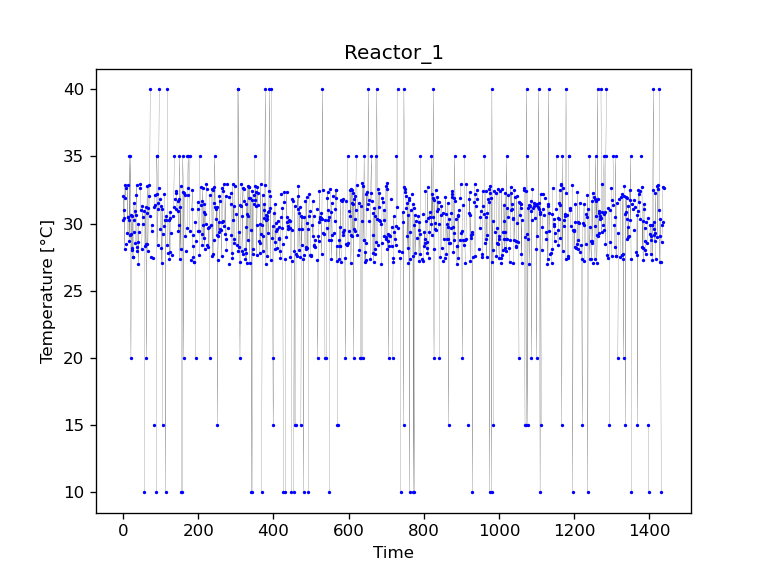

<IPython.core.display.Javascript object>


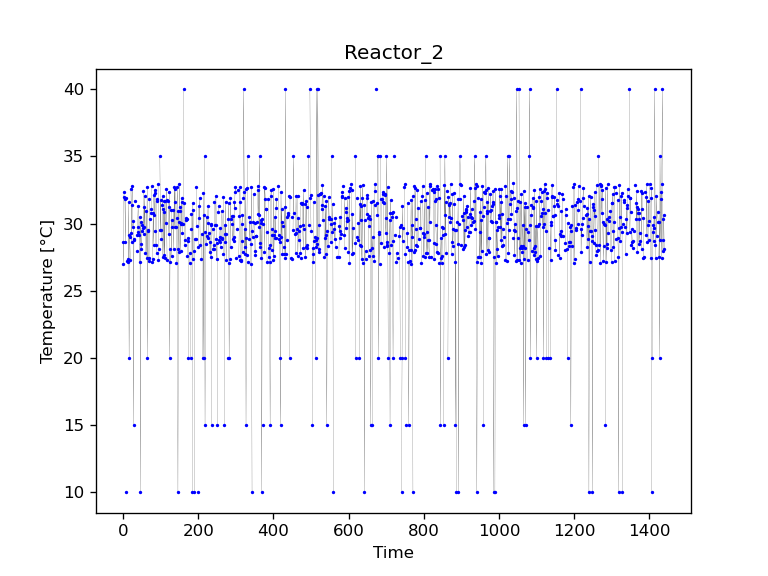

<IPython.core.display.Javascript object>


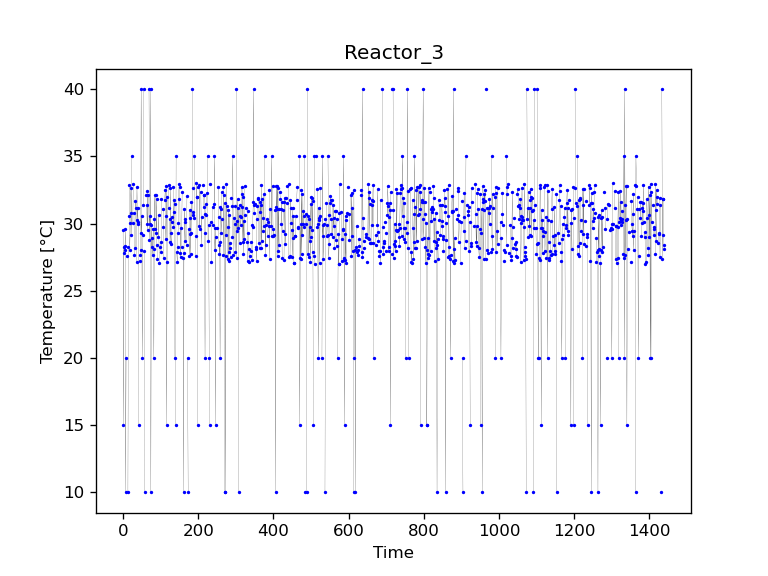

In [83]:
import matplotlib.pyplot as plt
%matplotlib nbagg
for react in data_frame_replace.columns:
    fig, ax = plt.subplots()
    ax.plot(data_frame_replace[react].values,
             ls="-",
             c='black',
             marker="o", 
             markersize=1.0,
             markeredgecolor='blue',
             lw=0.1)
    ax.set_xlabel("Time")
    ax.set_ylabel("Temperature [°C]")
    ax.set_title(react)

In [81]:
data_frame_replace.replace(to_replace=[40, 35, 20, 15, 10, np.nan], value=data_frame_replace.mean().mean())

,Reactor_1,Reactor_2,Reactor_3
Time_1,30.260430,28.670216,29.547106
Time_2,32.068657,27.028313,29.283585
Time_3,31.024495,31.955117,27.820240
Time_4,30.450560,32.347932,28.255213
Time_5,28.111969,29.283585,28.318185
...,...,...,...
Time_1436,32.697466,28.800873,31.802976
Time_1437,29.283585,27.935858,31.832252
Time_1438,30.125795,30.324671,29.188412
Time_1439,29.283585,30.676228,28.380814


## Groupby, aggregate e apply
Quando trabalhamos com dados qualitativos nominais pode ser necessário realizar agrupamentos e aplicar funções neste grupo de dados para conseguir entender melhor nosso sistema. Panda oferece uma serie de funções que ajudam a realizar isso. Cabe destacar que o potencial de Pandas está no uso em conjunto destas funções e outras.

---

A função [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) é umas das função **mais importantes** da biblioteca Pandas devido a que permite realizar o agrupamento de grande quantidade de dados e aplicar funções sobre esses valores agrupados de forma rápida. Para aplicar essa função utilizamos a seguinte sintaxe:
```python
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=<object object>, observed=False, dropna=True)
```

---

A função [`aggregate`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) permite aplicar uma (ou mais funções) sobre uma(s) coluna(s) ou fila(s).

**Observações**:
- Podem ser aplicadas funções `built-in function`, `lambda functions` ou funções criadas por nós;
- Podem ser aplicadas diferentes quantidades e tipos de funções para diferentes colunas ou filas do mesmo DataFrame;
- Ao momento de passar a funções não é necessário realizar a chamada da função.

A sintaxe utilizada para aplicar esta função é:
```python
DataFrame.aggregate(func=None, axis=0, *args, **kwargs)
```
***Recomendo ler a [documentação da função aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) para conseguir entender melhor seu funcionamento***.

---

A função [`apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) permite aplicar **UMA FUNÇÃO** sobre uma Series ou um DataFrame, especificando ou eixo onde dever ser aplicada a função.

**Observações**:
- Podem ser aplicadas funções `built-in function`,  `lambda functions` ou funções criadas por nós;
- Ao momento de passar a funções não é necessário realizar a chamada da função.

A sintaxe para utilizar esta função é:

```python
DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)
```
***Recomendo ler a [documentação da função apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) para conseguir entender melhor seu funcionamento***.









In [2]:
# Para entender o funcionamento da função groupby vamos a criar uma matrix de dados
n = 1500
np.random.seed(100)
empresas = [f"Empresa {np.random.randint(1, 51)}" for _ in range(n)]
valor_investido = [np.random.uniform(500, 3500) for _ in range(n)]
retorno = [np.random.uniform(2000, 5000) for _ in range(n)]
transferencias = [np.random.randint(50, 150) for _ in range(n)]
matriz = np.c_[valor_investido, retorno, transferencias]
colum = "Valor investido ($R), Retorno ($R), Transferencias".split(", ")
#-----------------------------------------------------------------------
# Criação do DataFrame
data_frame_groupby = pd.DataFrame(data=matriz, columns=colum )
data_frame_groupby["Lucro ($)"] = data_frame_groupby["Retorno ($R)"] - data_frame_groupby["Valor investido ($R)"]
data_frame_groupby["Empresas"] = empresas
data_frame_groupby

,Valor investido ($R),Retorno ($R),Transferencias,Lucro ($),Empresas
0,2395.146139,2267.914842,147.0,-127.231297,Empresa 9
1,573.809911,4686.133772,138.0,4112.323860,Empresa 25
2,1595.693889,2063.509230,66.0,467.815341,Empresa 4
3,950.708543,3344.221121,114.0,2393.512577,Empresa 40
4,1867.941222,3312.663318,116.0,1444.722095,Empresa 24
...,...,...,...,...,...
1495,2485.341177,2692.370879,62.0,207.029702,Empresa 15
1496,840.284504,2700.582463,93.0,1860.297958,Empresa 37
1497,2250.217715,4771.450109,73.0,2521.232394,Empresa 46
1498,2396.891151,4391.564187,98.0,1994.673036,Empresa 15


### Groupby

In [3]:
# Para entender o conceito de Groupby, vamos agrupar os dados por empresas
dfgroupby = data_frame_groupby.groupby(by="Empresas")

In [6]:
# Observemos que o retorno da função groupby é o endereço na memoria de um objeto
dfgroupby

In [7]:
# Para conseguir visualizar o DataFrame, devemos aplicar uma função sobre os valores
dfgroupby.mean()

,Valor investido ($R),Retorno ($R),Transferencias,Lucro ($)
Empresas,,,,
Empresa 1,1664.379181,3423.575079,92.466667,1759.195898
Empresa 10,2140.719171,3190.926190,100.814815,1050.207019
Empresa 11,2116.869748,3347.678176,90.678571,1230.808427
Empresa 12,1862.925647,3958.437340,91.086957,2095.511693
Empresa 13,1900.576222,3431.103574,94.969697,1530.527352
Empresa 14,1898.060800,3647.238621,88.678571,1749.177821
Empresa 15,2111.297602,3452.572584,89.243243,1341.274982
Empresa 16,1957.131902,3351.897950,92.000000,1394.766049
Empresa 17,1978.605630,3462.218560,106.028571,1483.612930


In [8]:
# Podemos utilizar o groupby para realizar agrupamento por camadas
agrupamento_empr_trans = data_frame_groupby.groupby(["Empresas", "Transferencias"]).mean()
agrupamento_empr_trans = data_frame_groupby.groupby(["Empresas", "Transferencias"]).mean()
agrupamento_empr_trans

Valor investido ($R)  Retorno ($R)    Lucro ($)
Empresas  Transferencias                                                 
Empresa 1 50.0                      949.481781   3258.569069  2309.087288
          52.0                     1150.382949   3464.347048  2313.964099
          59.0                     2718.050208   3536.096278   818.046070
          60.0                     1713.525700   3443.852804  1730.327104
          61.0                     2386.676100   2918.913180   532.237079
...                                        ...           ...          ...
Empresa 9 121.0                    1783.656084   3478.758634  1695.102549
          126.0                    1444.890047   2840.694665  1395.804618
          129.0                    1994.924685   3782.232389  1787.307704
          132.0                    2527.237143   3025.136451   497.899308
          147.0                    2395.146139   2267.914842  -127.231297

[1307 rows x 3 columns]

In [9]:
agrupamento_trans_empr = data_frame_groupby.groupby(["Transferencias", "Empresas"]).mean()
agrupamento_trans_empr

Valor investido ($R)  Retorno ($R)    Lucro ($)
Transferencias Empresas                                                   
50.0           Empresa 1             949.481781   3258.569069  2309.087288
               Empresa 12            876.443074   4658.884928  3782.441854
               Empresa 16            936.434790   3765.879569  2829.444779
               Empresa 18           1288.585806   3632.588113  2344.002307
               Empresa 38           3224.291878   2669.298845  -554.993033
...                                         ...           ...          ...
149.0          Empresa 39            649.237729   2592.643863  1943.406134
               Empresa 41           1387.985223   4014.152906  2626.167683
               Empresa 42           1901.519976   4938.360410  3036.840434
               Empresa 43           1514.334239   4598.270672  3083.936434
               Empresa 46            934.089746   3387.466042  2453.376296

[1307 rows x 3 columns]

In [10]:
# E se queremos realizar filtragem ao momento de aplicar o filtro?
agrupamento_empr_trans[(agrupamento_empr_trans["Valor investido ($R)"]>1800) & 
                        (agrupamento_empr_trans["Lucro ($)"]>1500)]

Valor investido ($R)  Retorno ($R)    Lucro ($)
Empresas   Transferencias                                                 
Empresa 1  81.0                     2135.877267   4468.780056  2332.902789
           127.0                    2668.333667   4237.318294  1568.984627
Empresa 10 57.0                     1881.921732   3735.794141  1853.872409
           74.0                     1806.401431   3749.251654  1942.850223
           85.0                     2143.842458   3921.027887  1777.185429
...                                         ...           ...          ...
Empresa 8  70.0                     2550.492525   4337.466856  1786.974330
           93.0                     2009.062947   4228.183823  2219.120876
           101.0                    1994.210798   4795.585638  2801.374839
Empresa 9  117.0                    3074.262930   4891.414999  1817.152069
           129.0                    1994.924685   3782.232389  1787.307704

[203 rows x 3 columns]

In [11]:
# Podemos utilizar algums metodos para potencializar o uso de groupby
data_frame_groupby.groupby(["Empresas"]).get_group(("Empresa 1"))

,Valor investido ($R),Retorno ($R),Transferencias,Lucro ($),Empresas
59,754.555607,4576.840550,128.0,3822.284944,Empresa 1
74,3342.394319,4517.216631,59.0,1174.822313,Empresa 1
106,1472.905328,4414.208565,146.0,2941.303237,Empresa 1
153,1164.984570,2313.010752,105.0,1148.026182,Empresa 1
270,1622.946167,2737.280220,113.0,1114.334053,Empresa 1
283,1603.691062,2623.841086,94.0,1020.150025,Empresa 1
343,807.412306,2149.619527,72.0,1342.207221,Empresa 1
370,637.549984,2988.202114,146.0,2350.652130,Empresa 1
393,2353.250043,3289.043032,145.0,935.792988,Empresa 1
505,2962.442465,4111.280688,106.0,1148.838223,Empresa 1


In [12]:
data_frame_groupby.groupby(["Empresas", "Transferencias"]).get_group(("Empresa 1", 52))

,Valor investido ($R),Retorno ($R),Transferencias,Lucro ($),Empresas
1484,1150.382949,3464.347048,52.0,2313.964099,Empresa 1


In [ ]:
# Podemo ir além e obter mais informação
dfgroupby.aggregate({"Lucro ($)": [min, max, np.mean, np.std],
                     "Retorno ($R)": [min, max, np.mean],
                     "Transferencias": [min, max]})

### aggregate

In [19]:
# podemos aplicar aggreagate para um groupby de dois niveis

pd.set_option('display.max_rows', 10)
dfgroupby.aggregate({"Lucro ($)": [min, max, np.mean, np.std],
                     "Retorno ($R)": [min, max, np.mean],
                     "Transferencias": [min, max]})

Lucro ($)                                        Retorno ($R)  \
                    min          max         mean          std          min   
Empresas                                                                      
Empresa 1  -1029.431080  3822.284944  1759.195898  1037.584319  2149.619527   
Empresa 10 -1030.443270  3453.502875  1050.207019  1148.871827  2087.910491   
Empresa 11  -705.662450  3519.872560  1230.808427  1182.481833  2030.177115   
Empresa 12  -714.737098  4381.339656  2095.511693  1404.498163  2141.494135   
Empresa 13 -1148.533275  3866.567488  1530.527352  1247.353711  2023.691796   
...                 ...          ...          ...          ...          ...   
Empresa 50  -990.288601  3938.989383  1449.933507  1393.250156  2065.830055   
Empresa 6   -727.564360  3567.506539  1688.213603  1149.383245  2089.353807   
Empresa 7   -510.586105  3592.984526  1451.650602  1373.678412  2357.422076   
Empresa 8   -118.846695  4034.418406  1421.745980  1065.229522  2032.403154   
Empresa 9   -755.669977  4014.853833  1379.766633  1273.016471  2003.734967   

                                     Transferencias         
                    max         mean            min    max  
Empresas                                                    
Empresa 1   4947.407586  3423.575079           50.0  146.0  
Empresa 10  4851.489657  3190.926190           57.0  149.0  
Empresa 11  4657.737047  3347.678176           52.0  145.0  
Empresa 12  4996.272864  3958.437340           50.0  146.0  
Empresa 13  4924.526302  3431.103574           53.0  142.0  
...                 ...          ...            ...    ...  
Empresa 50  4978.907441  3451.352333           53.0  143.0  
Empresa 6   4791.384550  3365.633879           55.0  146.0  
Empresa 7   4573.603518  3450.452335           52.0  130.0  
Empresa 8   4795.585638  3370.077042           51.0  148.0  
Empresa 9   4990.171487  3355.734194           53.0  147.0  

[50 rows x 9 columns]

In [21]:
# Exemplo com dados de lingaugems de programação
df_ling = pd.read_csv("./Dados/programming_languages.csv")
df_ling

,year,language
0,1951,Regional Assembly Language
1,1952,Autocode
2,1954,IPL
3,1955,FLOW-MATIC
4,1957,FORTRAN
...,...,...
68,2011,Kotlin
69,2011,Red
70,2011,Elixir
71,2012,Julia


In [23]:
df_lig_grop = df_ling.groupby(by="year")
df_lig_grop["language"]

In [24]:
# Obtendo um dataframe com as linguagens criadas em cada
pd.set_option('display.max_rows', 50)
df_lig_grop["language"].apply(','.join)

year
1951                 Regional Assembly Language
1952                                   Autocode
1954                                        IPL
1955                                 FLOW-MATIC
1957                            FORTRAN,COMTRAN
1958                              LISP,ALGOL 58
1959                             FACT,COBOL,RPG
1962                          APL,Simula,SNOBOL
1963                                        CPL
1964                       Speakeasy,BASIC,PL/I
1966                                       JOSS
1967                                       BCPL
1968                                       Logo
1969                                          B
1970                               Pascal,Forth
1972                         C,Smalltalk,Prolog
1973                                         ML
1975                                     Scheme
1978                                       SQL 
1980                                       C++ 
1983                               

### apply

In [25]:
# Obtendo um dataframe com as linguagens criadas em cada
df_lig_grop["language"].apply(len).values
df_lig_grop["language"].apply(len).index.values

array([1951, 1952, 1954, 1955, 1957, 1958, 1959, 1962, 1963, 1964, 1966,
       1967, 1968, 1969, 1970, 1972, 1973, 1975, 1978, 1980, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1995, 1997,
       2000, 2001, 2002, 2003, 2005, 2006, 2007, 2009, 2010, 2011, 2012,
       2014])

<IPython.core.display.Javascript object>


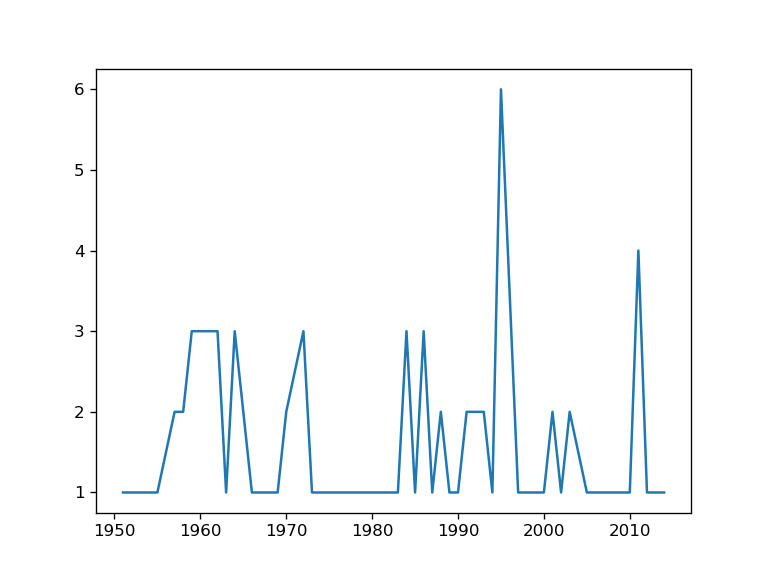

In [84]:
import matplotlib.pyplot as plt
plt.plot(df_lig_grop["language"].apply(len).index.values,
         df_lig_grop["language"].apply(len).values)

## Juntando DataFrames
Em algumas ocasiones pode ser necessário criar um DataFrame utilizando dois ou mais DataFrame já existentes. Panda facilita realizar estas operações utilizando as funções `concat`, `merge` e `join`.

### Concat
A função [`concat`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) permite realizar a união de dois DataFrame. A união pode ser feita adicionando o DataFrame como uma série de colunas ou filas novas. Para aplicar está funções se aplica a seguinte sintaxe:

```python
pandas.concat(objs: Union[Iterable[FrameOrSeries], Mapping[Label, FrameOrSeries]], axis='0', join: str = "'outer'", ignore_index: bool = 'False', keys='None', levels='None', names='None', verify_integrity: bool = 'False', sort: bool = 'False', copy: bool = 'True')
```
Cabe destacar que esse método é próprio das `series` e dos `DataFrame`

In [163]:
data = np.arange(1, 10).reshape((3, 3))
columnas = [f"Col {i}" for i in range(1, 4)]
data_frame_1 = pd.DataFrame(data=data, columns=columnas)
data_frame_2 = pd.DataFrame(data=data, columns=columnas)*10
data_frame_3 = pd.DataFrame(data=data, columns=columnas)*100

In [164]:
data_frame_1

,Col 1,Col 2,Col 3
0,1,2,3
1,4,5,6
2,7,8,9


In [165]:
data_frame_2

,Col 1,Col 2,Col 3
0,10,20,30
1,40,50,60
2,70,80,90


In [166]:
data_frame_3

,Col 1,Col 2,Col 3
0,100,200,300
1,400,500,600
2,700,800,900


In [112]:
# Passando os DataFrame que queremos juntar
pd.concat([data_frame_1, data_frame_2, data_frame_3])

,Col 1,Col 2,Col 3
0,1,2,3
1,4,5,6
2,7,8,9
0,10,20,30
1,40,50,60
2,70,80,90
0,100,200,300
1,400,500,600
2,700,800,900


In [118]:
# observemos que os índices foram mantidos para os DataFrame original
# Se queremos “reiniciar” os índices passamos o argumento
pd.concat([data_frame_1, data_frame_2, data_frame_3], ignore_index='False')

,Col 1,Col 2,Col 3
0,1,2,3
1,4,5,6
2,7,8,9
3,10,20,30
4,40,50,60
5,70,80,90
6,100,200,300
7,400,500,600
8,700,800,900


In [113]:
# Como vimos na reunião passada podemos passar o argumento axis para definir sobre qual eixo queremos realizar a operação
pd.concat([data_frame_1, data_frame_2, data_frame_3], axis=0)

,Col 1,Col 2,Col 3
0,1,2,3
1,4,5,6
2,7,8,9
0,10,20,30
1,40,50,60
2,70,80,90
0,100,200,300
1,400,500,600
2,700,800,900


In [114]:
pd.concat([data_frame_1, data_frame_2, data_frame_3], axis=1)

,Col 1,Col 2,Col 3,Col 1,Col 2,Col 3,Col 1,Col 2,Col 3
0,1,2,3,10,20,30,100,200,300
1,4,5,6,40,50,60,400,500,600
2,7,8,9,70,80,90,700,800,900


In [130]:
# O que acontece quando os index dos DataFrame são diferentes?
data_frame_2.index = pd.RangeIndex(start=3, stop=6, step=1)
data_frame_3.index = pd.RangeIndex(start=6, stop=9, step=1)
pd.concat([data_frame_1, data_frame_2, data_frame_3], axis=1)

,Col 1,Col 2,Col 3,Col 1,Col 2,Col 3,Col 1,Col 2,Col 3
0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,10.0,20.0,30.0,NaN,NaN,NaN
4,NaN,NaN,NaN,40.0,50.0,60.0,NaN,NaN,NaN
5,NaN,NaN,NaN,70.0,80.0,90.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,100.0,200.0,300.0
7,NaN,NaN,NaN,NaN,NaN,NaN,400.0,500.0,600.0
8,NaN,NaN,NaN,NaN,NaN,NaN,700.0,800.0,900.0


### merge
Pode ser necessário realizar a união de duas tabelas que compartem os elementos de uma coluna, neste caso a função `concat` não é a mais indicada. Pandas possui o método [`marge`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) que realiza a junção de duas tabelas mesclando os elementos que compartilham a mesma coluna. A sintaxe para ralizar essa operação é:
```python
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes='_x', '_y', copy=True, indicator=False, validate=None)
```

In [135]:
# Modificando os DataFrame
data_frame_1["coluna em comum"] = "A B C".split(" ")
data_frame_2["coluna em comum"] = "A C B".split(" ")

In [136]:
data_frame_1

,Col 1,Col 2,Col 3,coluna em comum
0,1,2,3,A
1,4,5,6,B
2,7,8,9,C


In [137]:
data_frame_2

,Col 1,Col 2,Col 3,coluna em comum
3,10,20,30,A
4,40,50,60,C
5,70,80,90,B


In [141]:
pd.merge(data_frame_1, data_frame_2, on="coluna em comum")

,Col 1_x,Col 2_x,Col 3_x,coluna em comum,Col 1_y,Col 2_y,Col 3_y
0,1,2,3,A,10,20,30
1,4,5,6,B,70,80,90
2,7,8,9,C,40,50,60


In [145]:
# Podemos passar mais de uma coluna em comum
data_frame_1["coluna em comum 2"] = "X O I".split(" ")
data_frame_2["coluna em comum 2"] = "Q I X".split(" ")

,Col 1_x,Col 2_x,Col 3_x,coluna em comum,coluna em comum 2,Col 1_y,Col 2_y,Col 3_y
0,7,8,9,C,I,40,50,60


In [143]:
data_frame_1

,Col 1,Col 2,Col 3,coluna em comum,coluna em comum 2
0,1,2,3,A,X
1,4,5,6,B,O
2,7,8,9,C,I


In [144]:
data_frame_2

,Col 1,Col 2,Col 3,coluna em comum,coluna em comum 2
3,10,20,30,A,Q
4,40,50,60,C,I
5,70,80,90,B,X


In [146]:
pd.merge(data_frame_1, data_frame_2, on=["coluna em comum", "coluna em comum 2"])

,Col 1_x,Col 2_x,Col 3_x,coluna em comum,coluna em comum 2,Col 1_y,Col 2_y,Col 3_y
0,7,8,9,C,I,40,50,60


In [149]:
pd.merge(data_frame_1, data_frame_2, on=["coluna em comum", "coluna em comum 2"], how="left")

,Col 1_x,Col 2_x,Col 3_x,coluna em comum,coluna em comum 2,Col 1_y,Col 2_y,Col 3_y
0,1,2,3,A,X,NaN,NaN,NaN
1,4,5,6,B,O,NaN,NaN,NaN
2,7,8,9,C,I,40.0,50.0,60.0


In [151]:
pd.merge(data_frame_1, data_frame_2, on=["coluna em comum", "coluna em comum 2"], how="right")

,Col 1_x,Col 2_x,Col 3_x,coluna em comum,coluna em comum 2,Col 1_y,Col 2_y,Col 3_y
0,NaN,NaN,NaN,A,Q,10,20,30
1,7.0,8.0,9.0,C,I,40,50,60
2,NaN,NaN,NaN,B,X,70,80,90


In [152]:
pd.merge(data_frame_1, data_frame_2, on=["coluna em comum", "coluna em comum 2"], how="outer")

,Col 1_x,Col 2_x,Col 3_x,coluna em comum,coluna em comum 2,Col 1_y,Col 2_y,Col 3_y
0,1.0,2.0,3.0,A,X,NaN,NaN,NaN
1,4.0,5.0,6.0,B,O,NaN,NaN,NaN
2,7.0,8.0,9.0,C,I,40.0,50.0,60.0
3,NaN,NaN,NaN,A,Q,10.0,20.0,30.0
4,NaN,NaN,NaN,B,X,70.0,80.0,90.0


In [153]:
pd.merge(data_frame_1, data_frame_2, on=["coluna em comum", "coluna em comum 2"], how="inner")

,Col 1_x,Col 2_x,Col 3_x,coluna em comum,coluna em comum 2,Col 1_y,Col 2_y,Col 3_y
0,7,8,9,C,I,40,50,60


### join
Também pode ser necessário combinar DataFrames que possam compartilhar os mesmos índices, neste caso as funções `concat` e `merge` não são as mais adequadas. Para resolver esses problemas os DataFrame pandas possuem o método [`join`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) o qual consegue juntar DataFrame avaliando as semelhanças entre os índices. A sintaxe utilizada é:
```python
DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
```

In [167]:
data_frame_1.index = 1, 2, 3
data_frame_2.index = 3, 1, 4

In [168]:
data_frame_1

,Col 1,Col 2,Col 3
1,1,2,3
2,4,5,6
3,7,8,9


In [169]:
data_frame_2

,Col 1,Col 2,Col 3
3,10,20,30
1,40,50,60
4,70,80,90


In [176]:
data_frame_1.join(data_frame_2, lsuffix=' Original')

,Col 1 Original,Col 2 Original,Col 3 Original,Col 1,Col 2,Col 3
1,1,2,3,40.0,50.0,60.0
2,4,5,6,NaN,NaN,NaN
3,7,8,9,10.0,20.0,30.0


In [ ]:
# Neste método temos o parâmetro how que modifica a forma de ralizar a união

In [177]:
data_frame_1.join(data_frame_2, lsuffix=' Original', how="left")

,Col 1 Original,Col 2 Original,Col 3 Original,Col 1,Col 2,Col 3
1,1,2,3,40.0,50.0,60.0
2,4,5,6,NaN,NaN,NaN
3,7,8,9,10.0,20.0,30.0


In [178]:
data_frame_1.join(data_frame_2, lsuffix=' Original', how="right")

,Col 1 Original,Col 2 Original,Col 3 Original,Col 1,Col 2,Col 3
3,7.0,8.0,9.0,10,20,30
1,1.0,2.0,3.0,40,50,60
4,NaN,NaN,NaN,70,80,90


In [179]:
data_frame_1.join(data_frame_2, lsuffix=' Original', how="inner")

,Col 1 Original,Col 2 Original,Col 3 Original,Col 1,Col 2,Col 3
1,1,2,3,40,50,60
3,7,8,9,10,20,30


In [180]:
data_frame_1.join(data_frame_2, lsuffix=' Original', how="outer")

,Col 1 Original,Col 2 Original,Col 3 Original,Col 1,Col 2,Col 3
1,1.0,2.0,3.0,40.0,50.0,60.0
2,4.0,5.0,6.0,NaN,NaN,NaN
3,7.0,8.0,9.0,10.0,20.0,30.0
4,NaN,NaN,NaN,70.0,80.0,90.0
